Individual Monte Carlo simulation animation saved as 'monte_carlo_simulation_individual.gif'
Accumulated Monte Carlo simulation animation saved as 'monte_carlo_simulation_accumulated.gif'


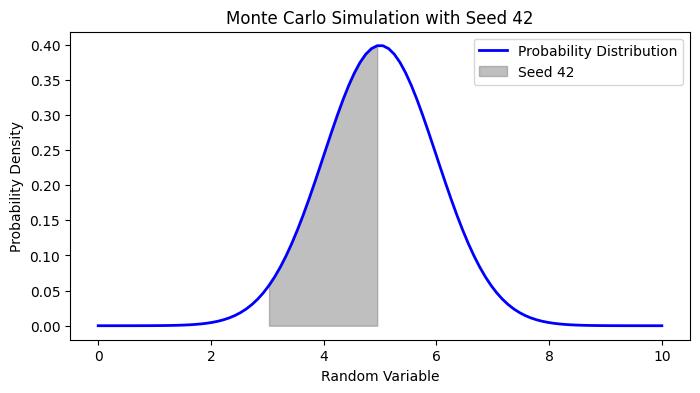

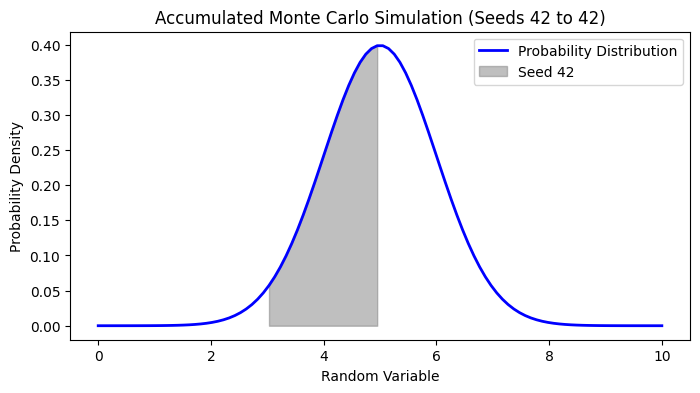

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Initialize the Figure and Axes for the first animation
fig, ax = plt.subplots(figsize=(8, 4))

# Create a list to store the artists for each frame
artists1 = []

# Create a function to update the animation
def update(frame):
    ax.clear()
    
    # Create the probability distribution curve
    x = np.linspace(0, 10, 100)
    y = np.exp(-(x - 5)**2 / 2) / np.sqrt(2 * np.pi)
    ax.plot(x, y, color='blue', linewidth=2, label='Probability Distribution')
    
    # Shaded area based on the current seed value
    seed = 42 + frame  # Start with seed 42 and increment for each frame
    np.random.seed(seed)
    random_start = np.random.uniform(0, 10 - 2)
    random_end = random_start + 2
    ax.fill_between(x, 0, y, where=(x >= random_start) & (x <= random_end), color='gray', alpha=0.5, label=f'Seed {seed}')
    
    # Add labels and title
    ax.set_xlabel('Random Variable')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Monte Carlo Simulation with Seed {seed}')
    
    # Add legend
    ax.legend()

    # Capture the current axes as an artist and store it
    artists1.append((ax.figure,))

# Create the animation using FuncAnimation for the first animation
num_frames = 10  # Number of frames (number of Monte Carlo runs)
ani1 = FuncAnimation(fig, update, frames=num_frames, repeat=False, interval=1000)

# Initialize the Figure and Axes for the second animation
fig2, ax2 = plt.subplots(figsize=(8, 4))

# Create a list to store the artists for the second animation
artists2 = []

# Create a function to update the second animation
def update2(frame):
    ax2.clear()
    
    # Create the probability distribution curve
    x = np.linspace(0, 10, 100)
    y = np.exp(-(x - 5)**2 / 2) / np.sqrt(2 * np.pi)
    ax2.plot(x, y, color='blue', linewidth=2, label='Probability Distribution')
    
    # Shaded area based on all previous seed values
    for i in range(frame + 1):
        seed = 42 + i
        np.random.seed(seed)
        random_start = np.random.uniform(0, 10 - 2)
        random_end = random_start + 2
        ax2.fill_between(x, 0, y, where=(x >= random_start) & (x <= random_end), color='gray', alpha=0.5, label=f'Seed {seed}')
    
    # Add labels and title
    ax2.set_xlabel('Random Variable')
    ax2.set_ylabel('Probability Density')
    ax2.set_title(f'Accumulated Monte Carlo Simulation (Seeds 42 to {42 + frame})')
    
    # Add legend
    ax2.legend()

    # Capture the current axes as an artist and store it
    artists2.append((ax2.figure,))

# Create the animation using FuncAnimation for the second animation
ani2 = FuncAnimation(fig2, update2, frames=num_frames, repeat=False, interval=1000)

# Save both animations as GIF files
ani1.save('monte_carlo_simulation_individual.gif', writer='pillow', fps=2)
ani2.save('monte_carlo_simulation_accumulated.gif', writer='pillow', fps=2)

# Display the saved animation filenames
print("Individual Monte Carlo simulation animation saved as 'monte_carlo_simulation_individual.gif'")
print("Accumulated Monte Carlo simulation animation saved as 'monte_carlo_simulation_accumulated.gif'")